<a href="https://colab.research.google.com/github/gfulton-redhat/borracho/blob/main/Copy_of_%5BAI_Dojo%5D_How_to_run_open_source_models_from_Hugging_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to run open source models from Hugging Face

by [Alberto Falossi](afalossi@redhat.com) - _OpenShift Observability Intelligence_

This notebook shows you how to use one of the thousands of open source AI models hosted on [Hugging Face](https://hf.co) (HF). Use these examples to quickly test the behavior of the different models and validate your ideas.

---

Select _File -> Save a copy in Drive_ to clone it and make your own changes.

In [ ]:
# MODEL_ID = "mistralai/Mistral-7B-v0.1"
MODEL_ID = "mistralai/Mistral-7B-Instruct-v0.1"
# MODEL_ID =  "mistralai/Mixtral-8x7B-Instruct-v0.1"

# the prompt syntax is different for each model (see the model documentation)
def format_prompt(text):
  return f"<s>[INST] {text} [/INST]" # Mistral

## Running a model remotely

This is the official HF client API for running a model remotely. Not all models are available through the API.

See https://huggingface.co/docs/huggingface_hub/v0.20.3/guides/inference for the parameters

In [ ]:
!pip install --quiet --upgrade huggingface_hub

In [ ]:
from huggingface_hub import InferenceClient

# NOTE: Don't include any sensitive/confidential data in the prompt!
prompt = "What is Saturday's mega million lotto number?"

model = InferenceClient(model=MODEL_ID)
output = model.text_generation(prompt, max_new_tokens=200)

print(output)



Saturday's Mega Millions lottery number is 11, 17, 22, 29, 31, and 38. The Megaplier number is 4.


### Same as above, but using LangChain

[LangChain](https://python.langchain.com/docs/get_started/introduction) is a popular AI abstraction library for interacting with language models. It's compatible with Hugging Face, OpenAI, and many others.

In many tutorials/demos on the web you'll find LangChain instead of the native Inference API.

In [ ]:
!pip install --quiet --upgrade langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.9/815.9 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 6.9 MB/s eta 0:00:00


In [ ]:
# LangChain doesn't read the Google Colab secrets automatically
# You can directly HUGGINGFACEHUB_API_TOKEN
import os
from google.colab import userdata
os.environ["HUGGINGFACEHUB_API_TOKEN"] = userdata.get("HF_TOKEN")

In [ ]:
from langchain import HuggingFaceHub

model = HuggingFaceHub(repo_id=MODEL_ID)
output = model(prompt)

print(output)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


What is Saturday's mega million lotto number?

Saturday's Mega Millions lottery number is 11, 17, 22, 29, 31, and 38. The Megaplier number is 4.


### Not only language models

Hugging Face hosts [several types of models](https://huggingface.co/tasks). This is a text-to-image model, executed via the Inference API:




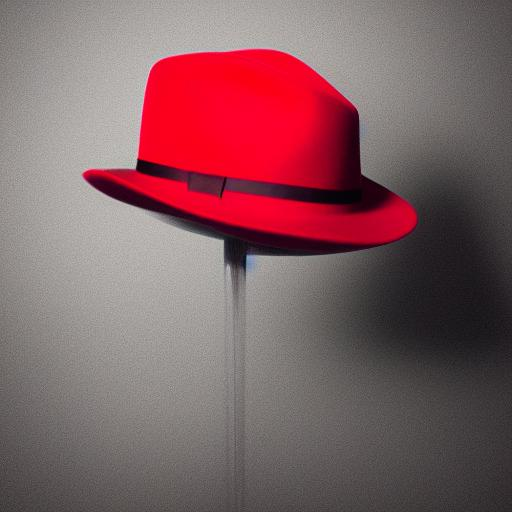

In [ ]:
InferenceClient(model="runwayml/stable-diffusion-v1-5").text_to_image("a fedora red hat ")

## Running a model locally

Any HF model can be downloaded and executed locally, assuming you have the right hardware. Be sure to use the latest `transformers` library, which provides a [common interface](https://huggingface.co/docs/transformers/index) for all the models.

To run this code switch the runtime to GPU (Runtime -> Change Runtime -> T4 GPU).

> Note: This notebook still runs in a container in the Google cloud. **Do not send any sensitive/confidential data**. The model runs _really locally_ when you run the code in a local Jupyter notebook or Python 3.8+ terminal.

In [ ]:
!pip install --quiet --upgrade transformers
# !pip install git+https://github.com/huggingface/transformers to load the main branch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 12.9 MB/s eta 0:00:00


In [ ]:
!nvidia-smi

Tue Feb  6 13:08:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install --qui bitsandbytes accelerate # einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 29.8 MB/s eta 0:00:00


In [ ]:
import torch
import transformers
from transformers import AutoTokenizer, AutoModelForCausalLM

torch.set_default_device("cuda")

# model quantization is needed to run the model in the Google Colab T4 runtime
# it may not be necessary to run it on your laptop
# see https://huggingface.co/blog/4bit-transformers-bitsandbytes
bnb_config = transformers.BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

# download the model
model = transformers.AutoModelForCausalLM.from_pretrained(
    MODEL_ID,
    trust_remote_code=True,
    quantization_config=bnb_config,
    device_map='auto',
)

# download the tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained(
    MODEL_ID,
)

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

In [ ]:
%%time

prompt = format_prompt("Give me the recipe for pizza")

input_tokens = tokenizer(prompt, return_tensors="pt", add_special_tokens=False)

output_tokens = model.generate(
    **input_tokens,
    max_new_tokens=200,
    do_sample=True,
    pad_token_id=tokenizer.eos_token_id
)

output = tokenizer.batch_decode(output_tokens)

print(output[0])

<s> [INST] Give me the recipe for pizza [/INST] Here is a simple recipe for pizza that you can make at home:

Ingredients:
- Pizza Dough
- Tomato sauce
- Mozzarella cheese, shredded
- Toppings of your choice (such as pepperoni, peppers, onions, olives, mushrooms, etc)
- Salt and pepper to taste
- Olive oil
- garlic powder
- dried basil

Instructions:

1. Preheat your oven to 475 degrees Fahrenheit (245 degrees Celsius).
2. On a lightly floured surface, roll out the pizza dough to your desired thickness.
3. Place the rolled-out dough onto a baking sheet or pizza stone.
4. Brush the dough with a little bit of olive oil and sprinkle on garlic powder and dried basil.
5. Spread a layer of tomato sauce over the
CPU times: user 32.3 s, sys: 691 ms, total: 33 s
Wall time: 35.3 s


### Not only language models

Here is the [Bark](https://github.com/suno-ai/bark?tab=readme-ov-file#-usage-in-python) text-to-speech model

In [ ]:
from transformers import BarkModel
from transformers import AutoProcessor

model = BarkModel.from_pretrained("suno/bark-small")
processor = AutoProcessor.from_pretrained("suno/bark")

config.json:   0%|          | 0.00/8.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


generation_config.json:   0%|          | 0.00/4.91k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

speaker_embeddings_path.json:   0%|          | 0.00/61.1k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
%%time

prompt = "Greetings Professor Falken"

input_tokens = processor(prompt, return_tensors="pt")
output = model.generate(**input_tokens, do_sample=True)

from IPython.display import Audio
sampling_rate = model.generation_config.sample_rate
Audio(output[0].cpu().numpy(), rate=sampling_rate)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


CPU times: user 6.35 s, sys: 0 ns, total: 6.35 s
Wall time: 6.41 s
